# **ASSIGNMENT 11** #

## ***1. TEXT MINING - ELON MUSK*** ##

File : Elon_musk.csv

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
import re
import time
from wordcloud import WordCloud, STOPWORDS
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

import warnings
warnings.filterwarnings('ignore')
# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


## **IMPORTING DATA FROM THE FILE - Elon_musk.csv** ##

In [2]:
# Reading the data from the file 'Elon_musk.csv'
elon_musk_data = pd.read_csv("Elon_musk.csv", delimiter=",", encoding='latin-1')
elon_musk_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## **EDA (Exploratory Data Analysis)** ##

In [3]:
elon_musk_data.shape

(1999, 2)

#### ***Removing the redundant column 'Unnamed: 0'*** ####

In [4]:
elon_musk_data.drop(['Unnamed: 0'],inplace=True,axis=1)

#### ***Rename Columns*** ####

In [5]:
# Renaming column 'Text'
elon_musk_data.rename({'Text':'TWEETS'},axis=1,inplace=True)

In [6]:
# Checking data types
elon_musk_data.dtypes # check data types of all variables

TWEETS    object
dtype: object

In [7]:
elon_musk_data.head()

,TWEETS
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [8]:
elon_musk_data.shape

(1999, 1)

#### ***Number of Words*** ####

In [9]:
em_data = elon_musk_data.copy()

In [10]:
#em_data['WORD_COUNT'] = em_data['TWEETS'].apply(lambda x: len(str(x).split(" "))) # Alternate Method
em_data['WORD_COUNT'] = [len(str(x).split(" ")) for x in em_data['TWEETS']]

In [11]:
em_data[['TWEETS','WORD_COUNT']].head()

,TWEETS,WORD_COUNT
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


#### ***Number of Characters*** ####

In [12]:
# Here each character is counted including spaces
em_data['CHARACTER_COUNT'] = em_data['TWEETS'].str.len()

In [13]:
em_data[['TWEETS','CHARACTER_COUNT']].head()

,TWEETS,CHARACTER_COUNT
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


#### ***Average Word Length*** ####

In [14]:
def get_avg_wl(tweet):
  words = []
  words = tweet.split()
  return (sum(len(word) for word in words)/len(words))

em_data['AVG_WL'] = [get_avg_wl(x) for x in em_data['TWEETS']]
em_data[['TWEETS','AVG_WL']].head()

,TWEETS,AVG_WL
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


#### ***Number of stopwords*** ####

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

em_data['STOPWORDS'] = [len([x for x in str(x).split() if x.lower() in stop]) for x in em_data['TWEETS']]
em_data[['TWEETS','STOPWORDS']].head()

,TWEETS,STOPWORDS
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,6


#### ***Number of special characters*** ####

In [16]:
em_data['HASHTAGS'] = [len([x for x in str(x).split() if x.startswith('#')]) for x in em_data['TWEETS']]
em_data[['TWEETS','HASHTAGS']].head()

,TWEETS,HASHTAGS
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


#### ***Number of numeric*** ####

In [17]:
em_data['NUMERIC'] = [len([x for x in str(x).split() if x.isdigit()]) for x in em_data['TWEETS']]
em_data[['TWEETS','NUMERIC']].head()

,TWEETS,NUMERIC
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [18]:
em_data

,TWEETS,WORD_COUNT,CHARACTER_COUNT,AVG_WL,STOPWORDS,HASHTAGS,NUMERIC
0,@kunalb11 Im an alien,4,22,4.750000,1,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,5.384615,5,0,0
2,@joerogan @Spotify Great interview!,4,35,8.000000,0,0,0
3,@gtera27 Doge is underestimated,4,31,7.000000,1,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,104,5.176471,6,0,0
...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",23,144,5.260870,11,0,0
1995,@PPathole Make sure to read ur terms &amp; con...,12,77,5.500000,2,0,0
1996,@TeslaGong @PPathole Samwise Gamgee,4,35,8.000000,0,0,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,7,59,7.571429,2,0,0


#### ***Number of Uppercase words*** ####

In [19]:
em_data['UPPER'] = [len([x for x in str(x).split() if x.isupper()]) for x in em_data['TWEETS']]
em_data[['TWEETS','UPPER']].head()

,TWEETS,UPPER
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


#### ***Number of Rare Words*** ####

In [20]:
freq = pd.Series(' '.join(em_data['TWEETS']).split()).value_counts()[-10:]
freq

N3                         1
lab                        1
(N1                        1
detection                  1
Lab                        1
https://t.co/K77wXQ11yt    1
dicey                      1
accurate,                  1
thinks                     1
28                         1
dtype: int64

In [21]:
em_data.drop(['NUMERIC','HASHTAGS','STOPWORDS','AVG_WL','CHARACTER_COUNT','WORD_COUNT'],axis=1,inplace=True)

#### ***Percentage of Links attached in the tweets*** ####

In [22]:
em_data.TWEETS.str.contains('https://').value_counts() / len(em_data)

False    0.678339
True     0.321661
Name: TWEETS, dtype: float64

More than a quarter of the tweets include a URL.

#### ***Percentage of User Tags in the tweets*** ####

In [23]:
em_data.TWEETS.str.contains('@').value_counts() / len(em_data)

True     0.83942
False    0.16058
Name: TWEETS, dtype: float64

#### ***Total number of Tweets in the available DataFrame*** ####

In [24]:
# Total tweets
print('Total count of the tweets are', len(em_data.index), '\n')

Total count of the tweets are 1999 



#### ***Spelling Correction*** ####

In [25]:
# The textblob library is used for spelling correction that helps in reducing multiple copies of words
from textblob import TextBlob
#em_data['TWEETS'][:5].apply(lambda x: str(TextBlob(x).correct()))
[str(TextBlob(x).correct()) for x in em_data['TWEETS'][:5]]


['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack May tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Notify Great interview!',
 '@gtera27 One is underestimated',
 '@teslacn Congratulations Cela China for amazing execution last year. Now on to the next for even more!!']

#### ***N-grams*** ####

*N-grams = 1*

In [26]:
TextBlob(em_data['TWEETS'][3]).ngrams(1)

[WordList(['gtera27']),
 WordList(['Doge']),
 WordList(['is']),
 WordList(['underestimated'])]

*N-grams = 2*

In [27]:
TextBlob(em_data['TWEETS'][2]).ngrams(2)

[WordList(['joerogan', 'Spotify']),
 WordList(['Spotify', 'Great']),
 WordList(['Great', 'interview'])]

*N-grams = 3*

In [28]:
TextBlob(em_data['TWEETS'][4]).ngrams(3)

[WordList(['teslacn', 'Congratulations', 'Tesla']),
 WordList(['Congratulations', 'Tesla', 'China']),
 WordList(['Tesla', 'China', 'for']),
 WordList(['China', 'for', 'amazing']),
 WordList(['for', 'amazing', 'execution']),
 WordList(['amazing', 'execution', 'last']),
 WordList(['execution', 'last', 'year']),
 WordList(['last', 'year', 'Now']),
 WordList(['year', 'Now', 'on']),
 WordList(['Now', 'on', 'to']),
 WordList(['on', 'to', 'the']),
 WordList(['to', 'the', 'next']),
 WordList(['the', 'next', 'for']),
 WordList(['next', 'for', 'even']),
 WordList(['for', 'even', 'more'])]

##### ***Things on his mind*** #####

 let's see what we can dig up with a super-simple word tokenization on these tweets. What does Elon Musk think about various topics?

In [29]:

from nltk import word_tokenize
tokens = em_data.TWEETS.map(word_tokenize)

def what_does_elon_think_about(x):
    x_l = x.lower()
    x_t = x.title()
    return em_data.loc[tokens.map(lambda sent: x_l in sent or x_t in sent).values]

In [30]:
what_does_elon_think_about('meme').TWEETS.values.tolist()

['I am become meme,\nDestroyer of shorts']

In [31]:
what_does_elon_think_about('oil').TWEETS.values.tolist()

['@BernieSanders That bs was pushed by oil &amp; gas interests to distract people from the $5 *trillion* per year they re\x85 https://t.co/pTAWt9dHHc']

In [32]:
what_does_elon_think_about('life').TWEETS.values.tolist()

['@flcnhvy Tesla is responsible for 2/3 of all the personal &amp; professional pain in my life combined. But it was worth it.',
 'Life, the Universe and Everything https://t.co/1ZCzInfc4u',
 'This is a life leader launch, so more risk than normal https://t.co/EtFP9IELrf',
 '@Astronomiaum Life in glass domes at first. Eventually, terraformed to support life, like Earth.',
 '@peterrhague It\x92s designed to make life multiplanetary, otherwise extreme overkill for mere Earth sector activity!\x85 https://t.co/yjLTT8pEEu',
 '@teslaownersSV @toadmeister I\x92ve spent more than half my life in California &amp; love the state. But, frankly, I think\x85 https://t.co/s5xouoedjT',
 '@bamtheteslaman1 @cleantechnica Doesn\x92t seem to be any life in this solar system. Maybe under the ice of Europa or\x85 https://t.co/izk0v9Gi47',
 'Speedrunning Factorio in real life \x85',
 'Story of my life',
 '@teslavibes Couldn\x92t agree more \x97 major software improvements are already in place to extend its l

In [33]:
what_does_elon_think_about('time').TWEETS.values.tolist()

['@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 '@itsALLrisky Doge appears to be inflationary, but is not meaningfully so (fixed # of coins per unit time), whereas\x85 https://t.co/4UH4rARC6T',
 '@UniverCurious Extremely misleading image, as doesn\x92t reflect true time cost to people or rain &amp; pain',
 'Time to tell the story of Tesla &amp; SpaceX',
 'Next time, we try pull *up* method https://t.co/J1M7WHLRDR',
 'On Clubhouse tonight at 10pm LA time',
 '@Erdayastronaut @SpaceX Was also thinking that SpaceX Boca should hold fun parties and give tours for the community from time to time',
 '@truth_tesla @Tesmanian_com Perhaps slightly more confident, but it\x92s essential to view this as output vs time. As\x85 https://t.co/RkFVJvotSE',
 '@Suvitruf @archillect Haha sexy cropping champion of all time',
 '@Erdayastronaut @rweb11742 Damn, that\x92s not easy! I spent quite a bit of time looking at Russian/Ukrainian engines. They\x92re good.',

## **VISUALIZATIONS** ##

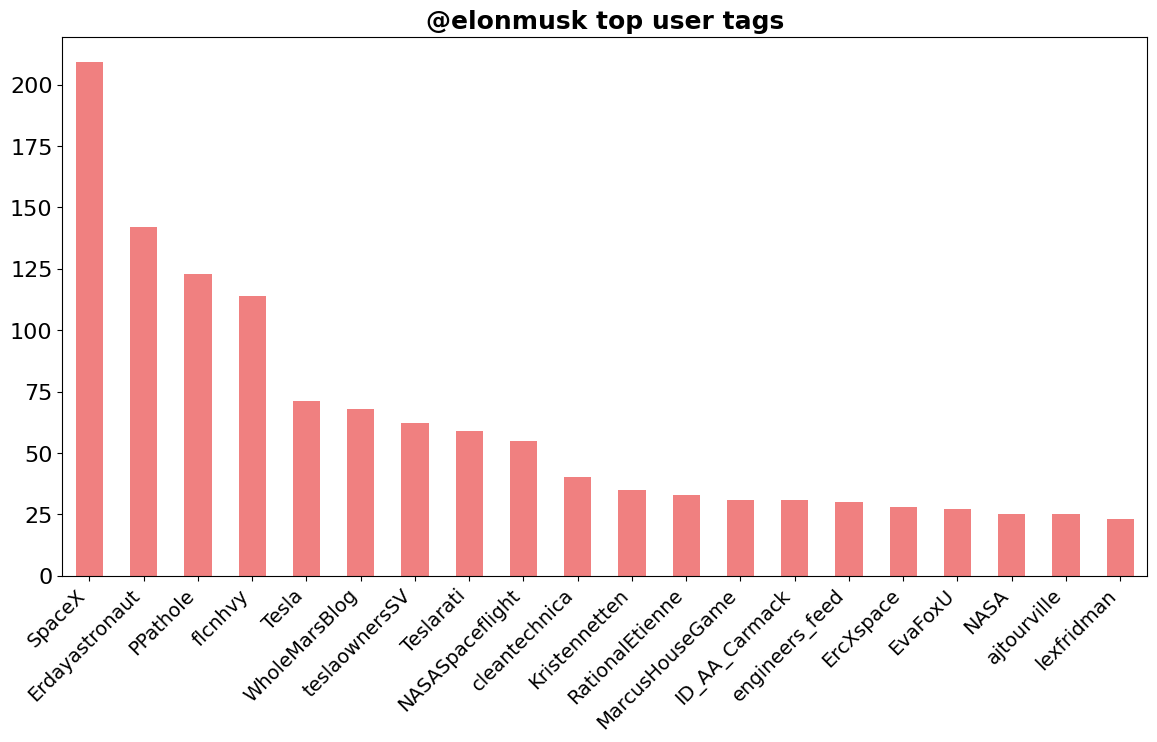

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools

c = list(
itertools.chain(
    *em_data.TWEETS.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)

plt.gca().set_title('@elonmusk top user tags', weight='bold', size = '18')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=14)
pass

### **BASIC TEXT PROCESSING** ###

#### ***A. For Classification*** ####

##### ***Collecting all the Tweets for Textual Pre-Processing*** #####

In [35]:
tweets=[Text.strip() for Text in em_data.TWEETS] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

##### ***Combining all the Tweets into Text*** #####

In [36]:
# Joining the list into one string/text
tweets_text=' '.join(tweets)
tweets_text[:1000]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

##### ***Using TweetTokenizer to remove all the Twitter Username Handles*** #####

In [37]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens[:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with']


##### ***Joining all the Tokenized words into Text/String*** #####

In [38]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

##### ***Removing all the Punctuations fromt the Combined Text*** #####

In [39]:
# Remove Punctuations
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

##### ***Removing all the URL's from the Text*** #####

In [40]:
# Removing https or urls within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

##### ***Again Tokenizing Text into individual words for further pre-processing*** #####

In [41]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be']


In [42]:
# Tokens count
len(text_tokens)

17847

##### ***Removing the Stopwords from the Text*** #####

In [43]:
# Removing Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word.lower() in my_stop_words]
print(no_stop_tokens[:100])

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'thought', 'would', 'fail', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'Clubhouse', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'U0001F923', 'U0001F923', 'true', 'power', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'app', 'sucks', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'Starlink', 'IPO', 'Starlink', 'staggeringly', 'diffic

##### ***Making all the Text into Lowercase*** #####

In [44]:
# Making the text data to lowercase
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'true', 'power', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'app', 'sucks', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'diffic

##### ***Stemming the Text using NLTK Library*** #####

In [45]:
# Stemming the text data
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'thought', 'would', 'fail', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'entertain', 'outcom', 'like', 'sent', 'agre', 'clubhous', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'u0001f923', 'u0001f923', 'true', 'power', 'crypto', 'wallet', 'give', 'privat', 'key', 'avoid', 'cost', 'app', 'suck', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'ye', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic']


##### ***Lemmatization of Text data using Spacy library*** #####

In [46]:
# Lemmatization of the text data
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account u0001f923 u0001f923 true power crypto wallet give private keys avoided costs app sucks nasa selected falcon heavy launch first two elements lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical


In [47]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertain', 'outcome', 'likely', 'send', 'agree', 'clubhouse', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'true', 'power', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'app', 'suck', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical']


In [48]:
clean_tweets=' '.join(lemmas)
clean_tweets[:1000]

'alien ray trace cyberpunk hdr nextlevel try great interview doge underestimate congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thank indeed tweet definitely represent realworld time allocation entertain outcome likely send agree clubhouse get real buy dogecoin lil x toddler hodler definitely issue sentencing seem bit high thank fix please unlock account u0001f923 u0001f923 true power crypto wallet give private key avoid cost app suck nasa select falcon heavy launch first two element lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g mean price country difference taxis ship intend earth may idea apply mar u0001f923 u0001f923 xprize team manage 100 m carbon capture prize everyone tesla rec

##### ***Generate Word Cloud*** #####

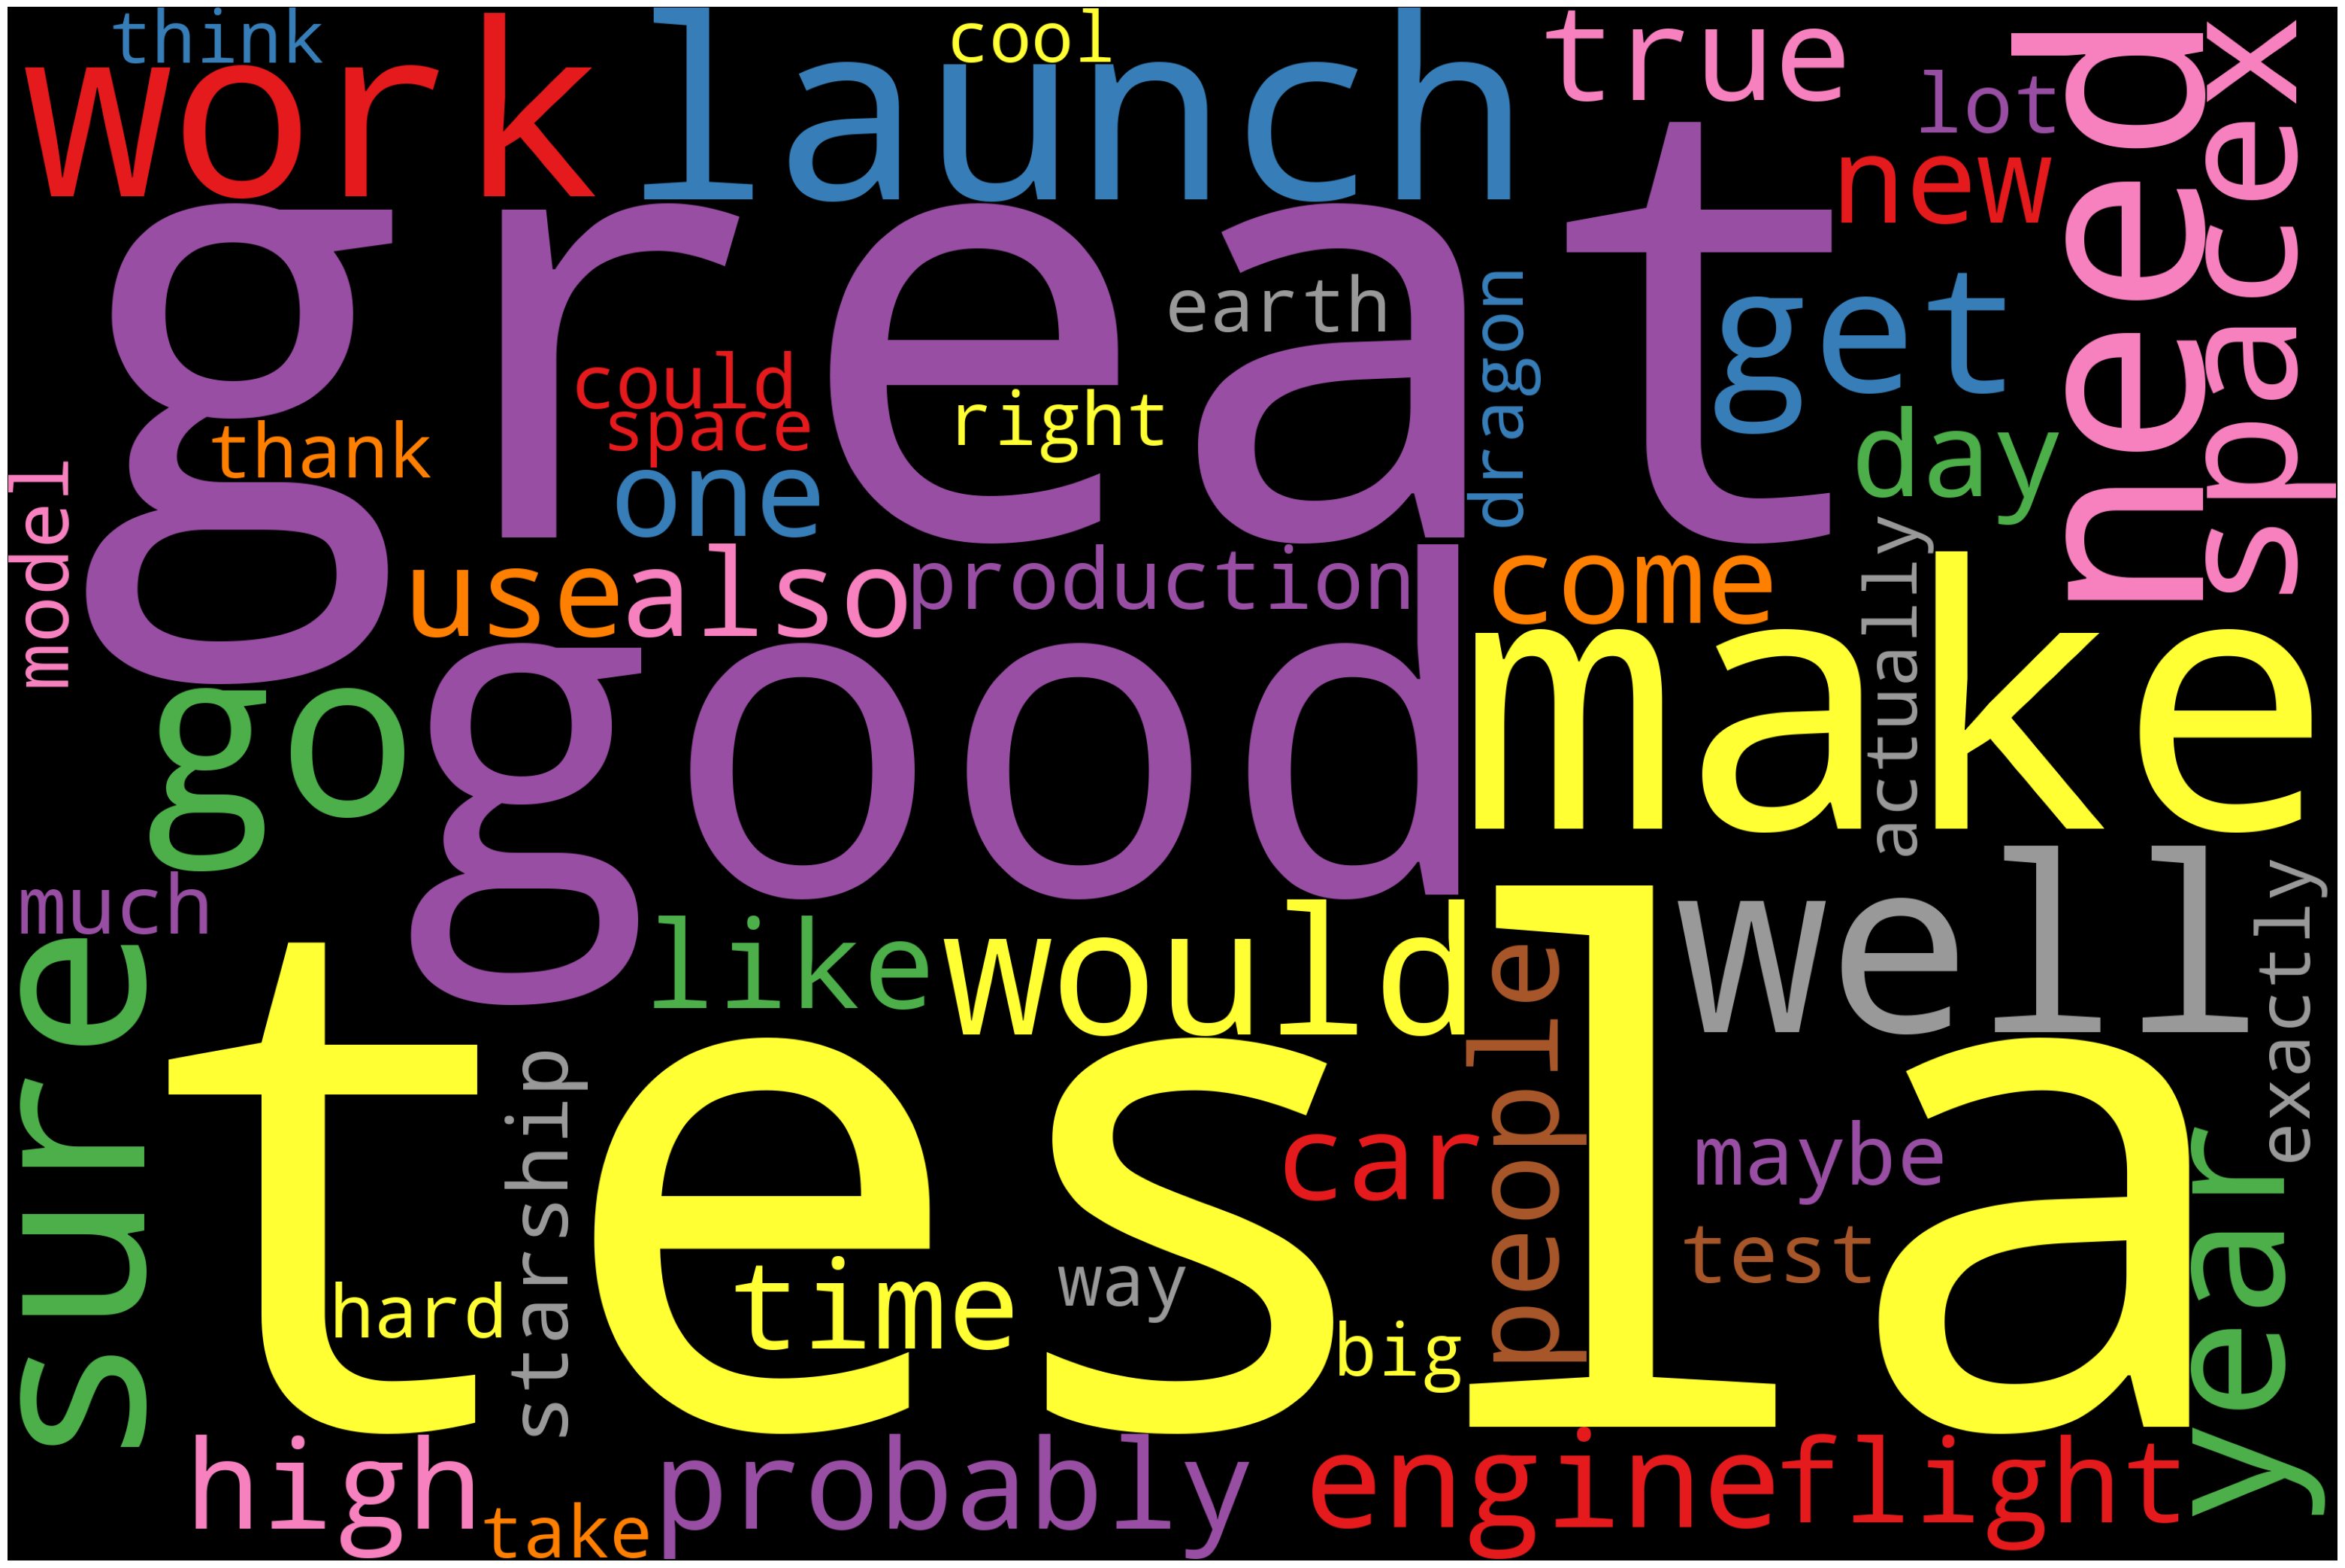

In [49]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

#STOPWORDS.add('pron')
#STOPWORDS.add('rt')
#STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=my_stop_words).generate(clean_tweets)
plot_cloud(wordcloud)

### **TEXT PRE-PROCESSING TECHNIQUES** ###

#### ***A. For Sentiment Analysis*** ####

keeping the DataFrame intact and each tweets separate from each other for sentiment analysis

##### ***a. Removing '@names'*** #####

Here we can see that at many places we have '@names', which is of no use, since it don't have any meaning, So needs to be removed.

In [50]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [51]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
em_data['TIDY_TWEETS'] = np.vectorize(remove_pattern)(em_data['TWEETS'], "@[\w]*")
em_data.head(10)

,TWEETS,UPPER,TIDY_TWEETS
0,@kunalb11 Im an alien,0,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,0,Great interview!
3,@gtera27 Doge is underestimated,0,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,0,Congratulations Tesla China for amazing execu...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would...",0,"Frodo was the underdoge,\nAll thought he would..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,Indeed! Tweets definitely do not represent r...
9,The most entertaining outcome is the most likely,0,The most entertaining outcome is the most likely


Seems good, now we don't have '@name' values

In [52]:
cleaned_tweets = []

for index, row in em_data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.TIDY_TWEETS.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

em_data['TIDY_TWEETS'] = cleaned_tweets
em_data.head(10)

,TWEETS,UPPER,TIDY_TWEETS
0,@kunalb11 Im an alien,0,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,0,Great interview!
3,@gtera27 Doge is underestimated,0,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,0,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...",0,"Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,0,The most entertaining outcome is the most likely


##### ***c. Removing tweets with empty text*** #####

In [53]:
em_data = em_data[em_data['TIDY_TWEETS']!='']
em_data.head(10)

,TWEETS,UPPER,TIDY_TWEETS
0,@kunalb11 Im an alien,0,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,0,Great interview!
3,@gtera27 Doge is underestimated,0,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,0,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...",0,"Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,0,The most entertaining outcome is the most likely


##### ***d. Dropping duplicate rows*** #####

In [54]:
em_data.drop_duplicates(subset=['TIDY_TWEETS'], keep=False)
em_data.head(10)

,TWEETS,UPPER,TIDY_TWEETS
0,@kunalb11 Im an alien,0,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,0,Great interview!
3,@gtera27 Doge is underestimated,0,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,0,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...",0,"Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,0,The most entertaining outcome is the most likely


##### ***e. Resetting index*** #####

In [55]:
em_data = em_data.reset_index(drop=True)
em_data.head(10)

,TWEETS,UPPER,TIDY_TWEETS
0,@kunalb11 Im an alien,0,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,0,Great interview!
3,@gtera27 Doge is underestimated,0,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,0,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...",0,"Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0,Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,0,The most entertaining outcome is the most likely


##### ***f. Removing Punctuations, Numbers and Special characters*** #####

In [56]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [57]:
# em_data['TIDY_TWEETS'] = em_data['TIDY_TWEETS'].apply(lambda x: clean_text(x)) # Using Lambda
em_data['TIDY_TWEETS'] = [(clean_text(x)) for x in em_data['TIDY_TWEETS']]
em_data.head(10)

,TWEETS,UPPER,TIDY_TWEETS
0,@kunalb11 Im an alien,0,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,0,great interview
3,@gtera27 Doge is underestimated,0,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,0,congratulations tesla china for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",0,frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0,haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,indeed tweets definitely do not represent real...
9,The most entertaining outcome is the most likely,0,the most entertaining outcome is the most likely


##### ***g. Function to remove emoji*** #####

In [58]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [59]:
#em_data['TIDY_TWEETS']=em_data['TIDY_TWEETS'].apply(lambda x: remove_emoji(x)) # Using Lambda
em_data['TIDY_TWEETS'] = [(remove_emoji(x)) for x in em_data['TIDY_TWEETS']]
em_data.head(10)

,TWEETS,UPPER,TIDY_TWEETS
0,@kunalb11 Im an alien,0,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,0,great interview
3,@gtera27 Doge is underestimated,0,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,0,congratulations tesla china for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",0,frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0,haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,indeed tweets definitely do not represent real...
9,The most entertaining outcome is the most likely,0,the most entertaining outcome is the most likely


In [60]:
# em_data['TOKENIZED_TWEETS'] = em_data['TIDY_TWEETS'].apply(lambda x: nltk.word_tokenize(x)) # Using Lambda
em_data['TOKENIZED_TWEETS'] = [(nltk.word_tokenize(x)) for x in em_data['TIDY_TWEETS']]
em_data.head(10)

,TWEETS,UPPER,TIDY_TWEETS,TOKENIZED_TWEETS
0,@kunalb11 Im an alien,0,im an alien,"[im, an, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,ray tracing on cyberpunk with hdr is nextlevel...,"[ray, tracing, on, cyberpunk, with, hdr, is, n..."
2,@joerogan @Spotify Great interview!,0,great interview,"[great, interview]"
3,@gtera27 Doge is underestimated,0,doge is underestimated,"[doge, is, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,0,congratulations tesla china for amazing execut...,"[congratulations, tesla, china, for, amazing, ..."
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,happy new year of the ox,"[happy, new, year, of, the, ox]"
6,"Frodo was the underdoge,\nAll thought he would...",0,frodo was the underdoge all thought he would f...,"[frodo, was, the, underdoge, all, thought, he,..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0,haha thanks,"[haha, thanks]"
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,indeed tweets definitely do not represent real...,"[indeed, tweets, definitely, do, not, represen..."
9,The most entertaining outcome is the most likely,0,the most entertaining outcome is the most likely,"[the, most, entertaining, outcome, is, the, mo..."


In [61]:
em_data.drop(['TOKENIZED_TWEETS'],axis=1,inplace=True)

##### ***h. Removing Stop words*** #####

In [62]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []
total = 0
for index, row in em_data.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.TIDY_TWEETS.split() if not word in stopwords_set and '#' not in word.lower()]
    total += len(words_without_stopwords)

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

em_data['ABSOLUTE_TIDY_TWEETS'] = cleaned_tweets
em_data.head(10)
print(total)

10140


*i. Tokenize 'absolute_tidy_tweets'*

In [63]:
tokenized_tweet = em_data['ABSOLUTE_TIDY_TWEETS'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0                                         [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulations, tesla, china, amazing, execu...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweets, definitely, represent, realwo...
9                      [entertaining, outcome, likely]
Name: ABSOLUTE_TIDY_TWEETS, dtype: object

*j. Converting words to Lemma*

In [64]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0                                         [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulation, tesla, china, amazing, execut...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweet, definitely, represent, realwor...
9                      [entertaining, outcome, likely]
Name: ABSOLUTE_TIDY_TWEETS, dtype: object

*k. Joining all tokens into sentences*

In [65]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

em_data['ABSOLUTE_TIDY_TWEETS'] = tokenized_tweet
em_data.head(10)

,TWEETS,UPPER,TIDY_TWEETS,ABSOLUTE_TIDY_TWEETS
0,@kunalb11 Im an alien,0,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,0,great interview,great interview
3,@gtera27 Doge is underestimated,0,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,0,congratulations tesla china for amazing execut...,congratulation tesla china amazing execution l...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,happy new year of the ox,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",0,frodo was the underdoge all thought he would f...,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0,haha thanks,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,indeed tweets definitely do not represent real...,indeed tweet definitely represent realworld ti...
9,The most entertaining outcome is the most likely,0,the most entertaining outcome is the most likely,entertaining outcome likely


### ***Basic Feature Extaction*** ###

#### ***A. Applying bag of Words without N grams*** ####

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [67]:
print(cv.get_feature_names_out()[109:200])

['aber' 'able' 'abo' 'aboard' 'abort' 'absence' 'absolute' 'absolutely'
 'absorb' 'absorption' 'absurd' 'absurdly' 'ac' 'academia' 'accel'
 'accelera' 'accelerate' 'acceleration' 'accelerator' 'accept'
 'acceptable' 'access' 'accessible' 'accident' 'accidental' 'accommodate'
 'account' 'accura' 'accuracy' 'accurate' 'ace' 'achieve' 'achievement'
 'achy' 'acquisition' 'across' 'action' 'active' 'activity' 'actual'
 'actuall' 'actually' 'actuary' 'adagio' 'add' 'added' 'additive'
 'address' 'administer' 'adult' 'advanc' 'advance' 'advanced' 'advantage'
 'adventure' 'advertise' 'advice' 'advise' 'aero' 'afb' 'affair' 'affect'
 'affordable' 'africa' 'afternoon' 'age' 'ago' 'agony' 'agree' 'ah'
 'ahead' 'ahem' 'ai' 'aim' 'air' 'aircraft' 'airplane' 'ak' 'aka' 'alert'
 'alexander' 'algo' 'algorithm' 'alien' 'aliens' 'align' 'allocati'
 'allocation' 'allow' 'alloy' 'almost']


In [68]:
print(cv.get_feature_names_out()[:100])

['000' '005' '10' '100' '1000' '10000' '107' '10x' '11' '12' '122' '13'
 '130' '14' '140' '149' '15' '150' '155' '16' '162' '17' '18' '1880s' '1b'
 '1st' '20' '200' '2007' '2008' '2009' '2012' '2017' '2020' '2021' '2024'
 '2026' '2030' '20k' '210' '218' '21st' '22' '225' '23' '230' '24' '240'
 '25' '250' '250kw' '25gunsteslacom' '25k' '25th' '28' '28th' '29' '2k'
 '2nd' '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37'
 '3800' '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd'
 '445' '448' '4530' '4680' '479000' '48' '4d' '4th' '50' '50000' '50k'
 '60' '60000' '65' '69420' '6f' '6k' '727']


In [69]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### ***B. CountVectorizer with N-grams (Bigrams & Trigrams)*** ####

In [70]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(em_data))):
    review = re.sub('[^a-zA-Z]', ' ', em_data['ABSOLUTE_TIDY_TWEETS'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1938 [00:00<?, ?it/s]

In [71]:
corpus[3]

'doge underestim'

In [72]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [73]:
x.shape

(1938, 5000)

In [74]:
cv.get_feature_names_out()[:20]

array(['aber', 'abl', 'abort', 'absolut', 'absurd', 'acceler', 'accept',
       'access', 'accur', 'achiev', 'across', 'activ', 'actual', 'ad',
       'add', 'address', 'advanc', 'advantag', 'africa', 'age'],
      dtype=object)

In [75]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [76]:
count_df = pd.DataFrame(x, columns=cv.get_feature_names_out())
count_df

,aber,abl,abort,absolut,absurd,acceler,accept,access,accur,achiev,...,year get,year support,year sure,yesterday,yet,yup,zero,zero death,zero death oct,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1934,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### ***C. TF-IDF Vectorizer*** ####

In [77]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(em_data))):
    review = re.sub('[^a-zA-Z]', ' ', em_data['ABSOLUTE_TIDY_TWEETS'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1938 [00:00<?, ?it/s]

In [78]:
corpus[4]

'congratul tesla china amaz execut last year next even'

In [79]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x=tfidf_v.fit_transform(corpus).toarray()

In [80]:
x.shape

(1938, 5000)

In [81]:
tfidf_v.get_feature_names_out()[:20]

array(['aber', 'abl', 'abort', 'absolut', 'absurd', 'acceler', 'accept',
       'access', 'accur', 'achiev', 'across', 'activ', 'actual', 'ad',
       'add', 'address', 'advanc', 'advantag', 'africa', 'age'],
      dtype=object)

In [82]:
count_df = pd.DataFrame(x, columns=tfidf_v.get_feature_names_out())
count_df

,aber,abl,abort,absolut,absurd,acceler,accept,access,accur,achiev,...,year get,year support,year sure,yesterday,yet,yup,zero,zero death,zero death oct,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1934,0.0,0.0,0.0,0.0,0.0,0.0,0.341156,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1935,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1936,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### ***D. Named Entity Recognition (NER)*** ####

In [83]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [84]:
for token in doc_block[:50]:
    print(token,token.pos_)

alien PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
try VERB
great ADJ
interview NOUN
doge ADJ
underestimate ADJ
congratulation NOUN
tesla NOUN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
next ADP
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge ADJ
thought NOUN
would AUX
fail VERB
thank VERB
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld NOUN
time PROPN
allocation PROPN
entertain PROPN
outcome NOUN
likely ADV
send VERB
agree ADJ
clubhouse NOUN
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x PUNCT
toddler NOUN


##### ***Filtering out only the nouns and verbs from the Text to Tokens*** #####

In [85]:
# Filtering the nouns and verbs only
one_block=clean_tweets
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'doge', 'come', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'falcon', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'become', 'meme', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'time', 'try', 'pull']


##### ***Counting all the nouns and verbs present in the Tokens of words***#####

In [86]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,tesla,78
1,make,63
2,launch,62
3,year,49
4,work,48
5,need,44
6,go,43
7,come,42
8,get,38
9,day,38


##### ***Visualizing the Result of Top 10 nouns and verbs most frequently present in the tweets*** #####

<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

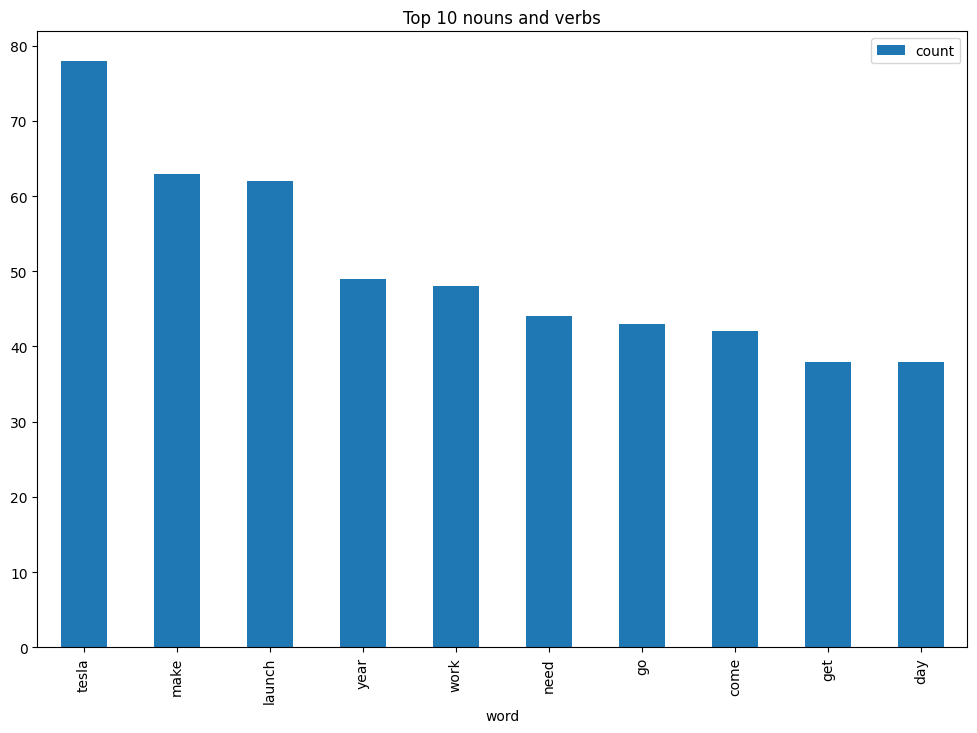

In [87]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

### **Feature Extraction** ###

#### ***A. Feature Extraction for 'Key Words'*** ####

In [88]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')

# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(em_data['ABSOLUTE_TIDY_TWEETS'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(em_data['ABSOLUTE_TIDY_TWEETS'])

In [89]:
em_data

,TWEETS,UPPER,TIDY_TWEETS,ABSOLUTE_TIDY_TWEETS
0,@kunalb11 Im an alien,0,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,0,great interview,great interview
3,@gtera27 Doge is underestimated,0,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,0,congratulations tesla china for amazing execut...,congratulation tesla china amazing execution l...
...,...,...,...,...
1933,"@flcnhvy True, it sounds so surreal, but the n...",0,true it sounds so surreal but the negative pro...,true sound surreal negative propaganda still a...
1934,@PPathole Make sure to read ur terms &amp; con...,0,make sure to read ur terms amp conditions befo...,make sure read ur term amp condition clicking ...
1935,@TeslaGong @PPathole Samwise Gamgee,0,samwise gamgee,samwise gamgee
1936,@PPathole Altho Dumb and Dumber is <U+0001F525...,1,altho dumb and dumber is,altho dumb dumber


### **Fetch sentiments** ###
#### ***a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)*** ####
#### ***b. Using TextBlob*** ####

In [90]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

#### ***a. Using NLTK's SentimentIntensityAnalyzer*** ####

In [91]:
sentiments_using_SIA = em_data.ABSOLUTE_TIDY_TWEETS.apply(lambda tweet: fetch_sentiment_using_SIA(tweet)) # Using Lambda
pd.DataFrame(sentiments_using_SIA.value_counts())

,ABSOLUTE_TIDY_TWEETS
pos,1737
neg,201


In [92]:
em_data.TIDY_TWEETS[3]

'doge is underestimated'

In [93]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(em_data.ABSOLUTE_TIDY_TWEETS[3])

{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}

In [94]:
df=pd.DataFrame()
df['TWEETS'] = em_data.ABSOLUTE_TIDY_TWEETS
#df['SCORES'] = em_data['TIDY_TWEETS'].apply(lambda review: sid.polarity_scores(review)) # Using Lambda
df['SCORES'] = [(sid.polarity_scores(review)) for review in em_data['TIDY_TWEETS']]
df.head()

,TWEETS,SCORES
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."


In [95]:
# df['COMPOUND']  = df['SCORES'].apply(lambda SCORES: SCORES['compound']) # Using Lambda
df['COMPOUND']  = [(SCORES['compound']) for SCORES in df['SCORES']]
df.head()

,TWEETS,SCORES,COMPOUND
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271


In [96]:
# df['SENTIMENT'] = df['COMPOUND'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral')) # Using Lambda
df['SENTIMENT'] = [('Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral')) for c in df['COMPOUND']]
df

,TWEETS,SCORES,COMPOUND,SENTIMENT
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,Negative
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271,Positive
...,...,...,...,...
1933,true sound surreal negative propaganda still a...,"{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",-0.4215,Negative
1934,make sure read ur term amp condition clicking ...,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.5994,Positive
1935,samwise gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1936,altho dumb dumber,"{'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'comp...",-0.7003,Negative


In [97]:
em_data.describe()

,UPPER
count,1938.000000
mean,0.417441
std,0.777620
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,7.000000


In [98]:
temp = df.groupby('SENTIMENT').count()['TWEETS'].reset_index().sort_values(by='TWEETS',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,SENTIMENT,TWEETS
2,Positive,873
1,Neutral,836
0,Negative,229


<Axes: xlabel='SENTIMENT', ylabel='count'>

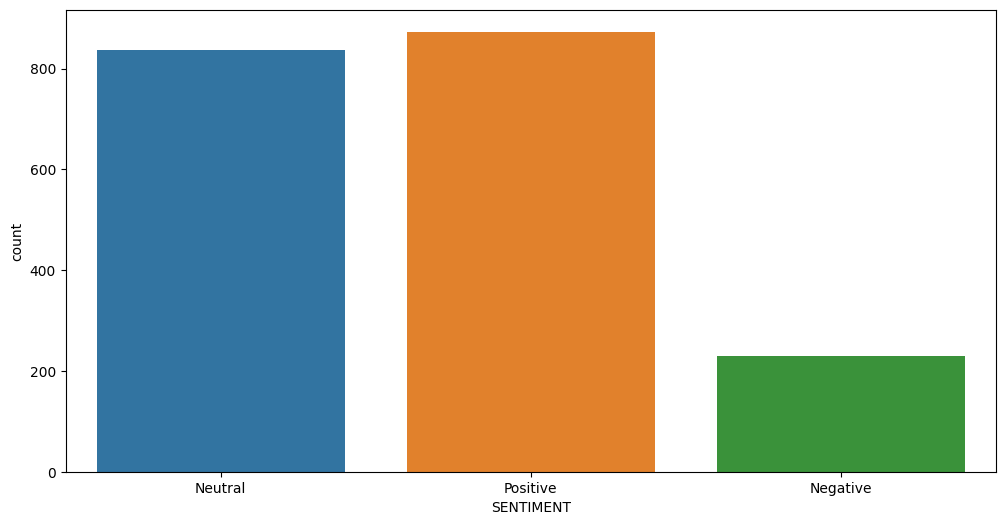

In [99]:
plt.figure(figsize=(12,6))
sns.countplot(x='SENTIMENT',data=df)

<Axes: xlabel='COMPOUND', ylabel='Density'>

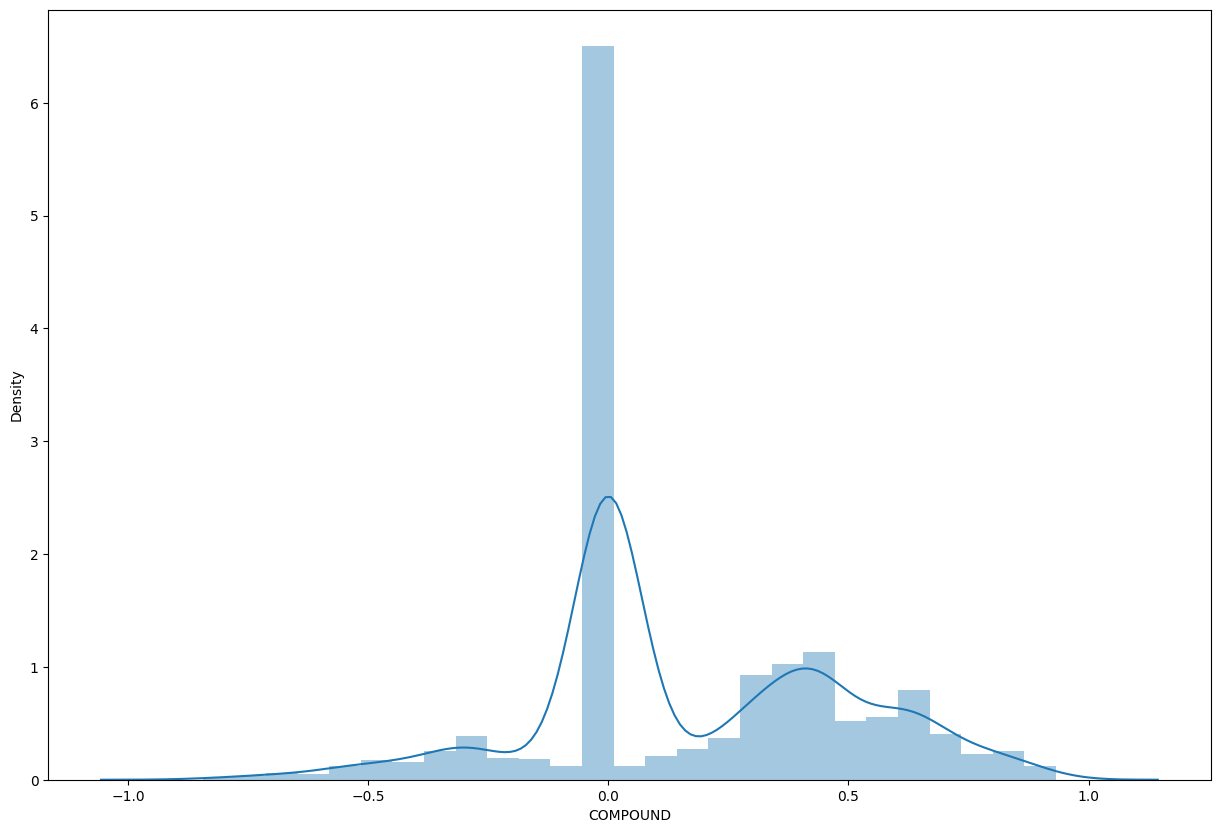

In [100]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['COMPOUND'])

<Axes: ylabel='COMPOUND'>

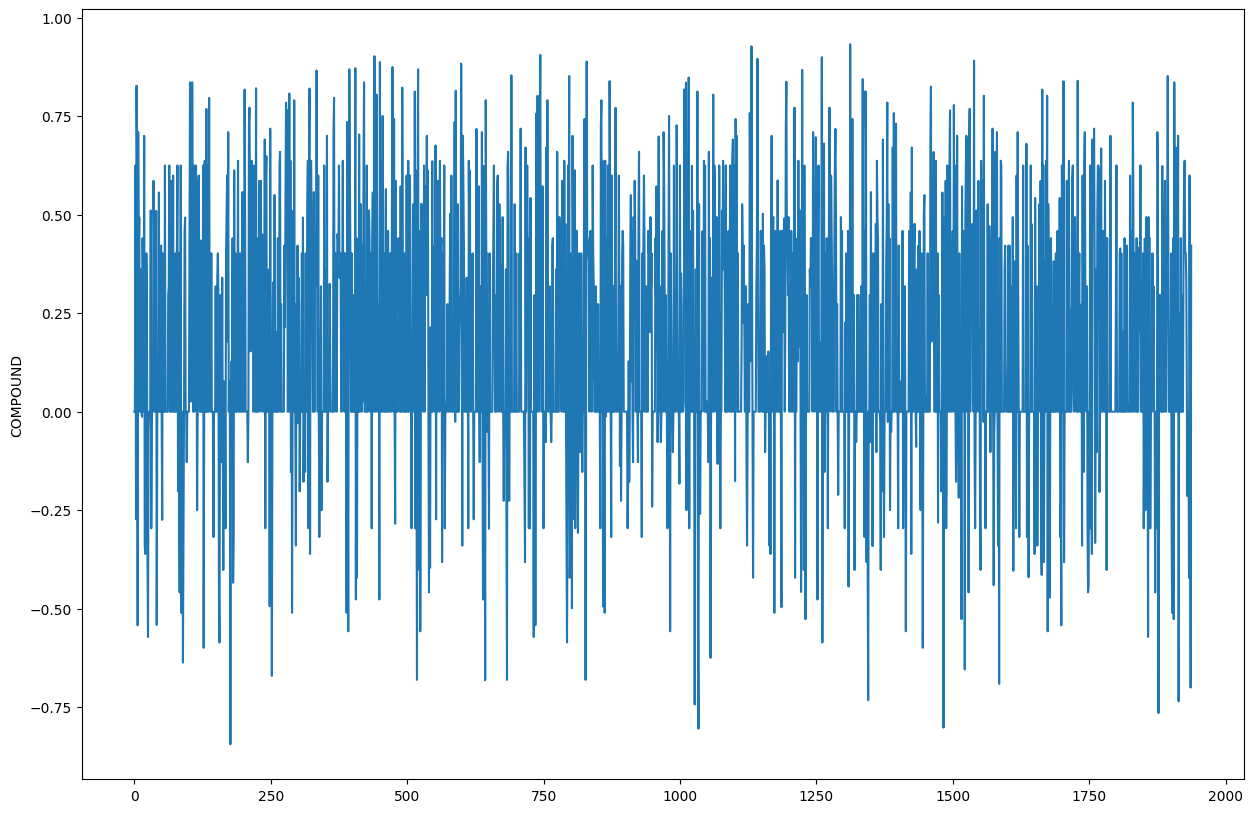

In [101]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='COMPOUND',x=df.index,data=df)

In [102]:
#df['WORD_COUNT'] = df['TWEETS'].apply(lambda x: len(str(x).split(" "))) # Using lambda
df['WORD_COUNT'] = [(len(str(x).split(" "))) for x in df['TWEETS']]
df[['TWEETS','WORD_COUNT']].head()

,TWEETS,WORD_COUNT
0,im alien,2
1,ray tracing cyberpunk hdr nextlevel tried,6
2,great interview,2
3,doge underestimated,2
4,congratulation tesla china amazing execution l...,9


<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='WORD_COUNT', ylabel='COMPOUND'>

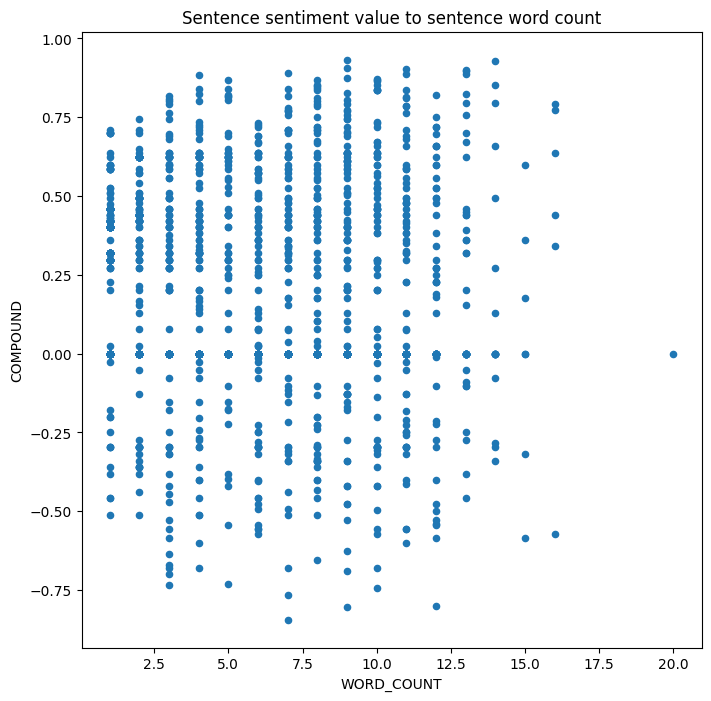

In [103]:
# Correlation analysis
df.plot.scatter(x='WORD_COUNT',y='COMPOUND',figsize=(8,8),title='Sentence sentiment value to sentence word count')

#### ***b. Using TextBlob*** ####

In [104]:
sentiments_using_textblob = em_data.ABSOLUTE_TIDY_TWEETS.apply(lambda tweet: fetch_sentiment_using_textblob(tweet)) # Using Lambda
pd.DataFrame(sentiments_using_textblob.value_counts())

,ABSOLUTE_TIDY_TWEETS
pos,1739
neg,199


**NLTK gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.**

In [105]:
em_data['SENTIMENT'] = sentiments_using_SIA
em_data.head()

,TWEETS,UPPER,TIDY_TWEETS,ABSOLUTE_TIDY_TWEETS,SENTIMENT
0,@kunalb11 Im an alien,0,im an alien,im alien,pos
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried,pos
2,@joerogan @Spotify Great interview!,0,great interview,great interview,pos
3,@gtera27 Doge is underestimated,0,doge is underestimated,doge underestimated,neg
4,@teslacn Congratulations Tesla China for amazi...,0,congratulations tesla china for amazing execut...,congratulation tesla china amazing execution l...,pos


### **Story Generation and Visualization** ###

#### ***A. Most common words in positive tweets*** ####

In [106]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

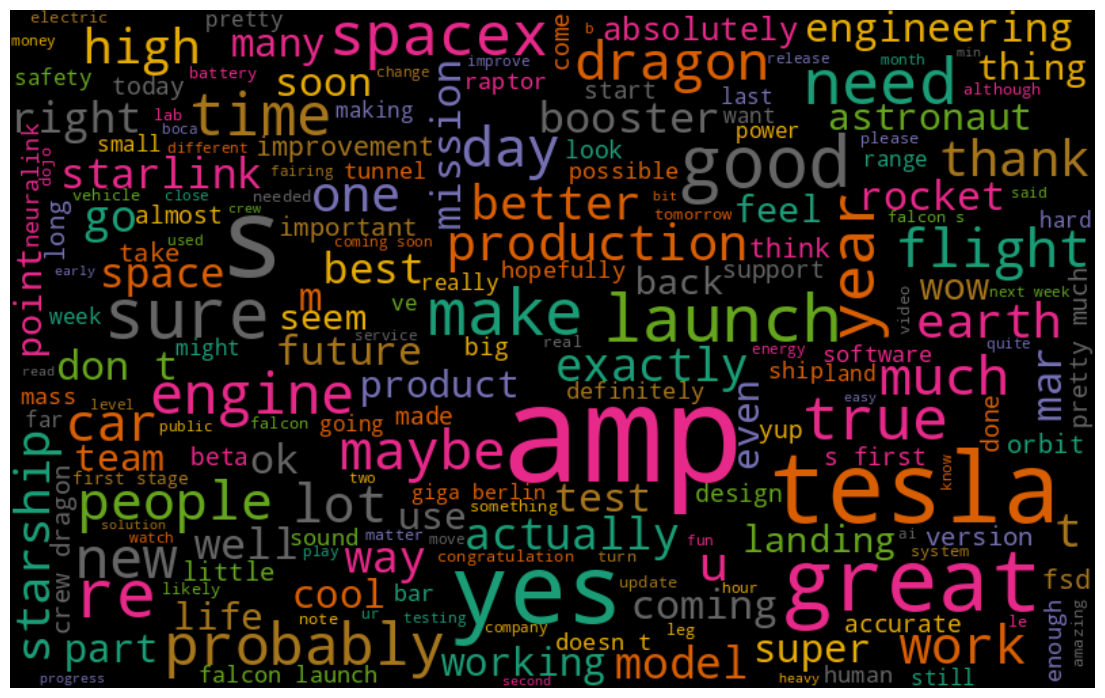

In [107]:
all_words = ' '.join([text for text in em_data['ABSOLUTE_TIDY_TWEETS'][em_data.SENTIMENT == 'pos']])
generate_wordcloud(all_words)

#### ***B. Most common words in negative tweets*** ####

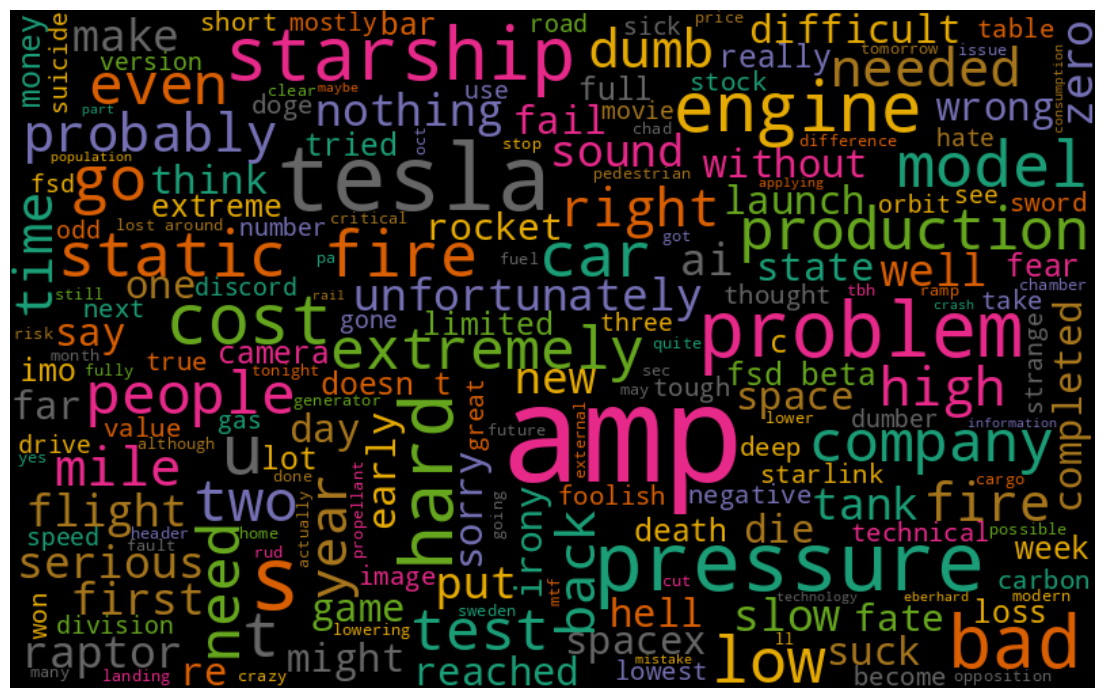

In [108]:
all_words = ' '.join([text for text in em_data['ABSOLUTE_TIDY_TWEETS'][em_data.SENTIMENT == 'neg']])
generate_wordcloud(all_words)

In [109]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [110]:
hashtags = hashtag_extract(em_data['TWEETS'])
hashtags = sum(hashtags, [])

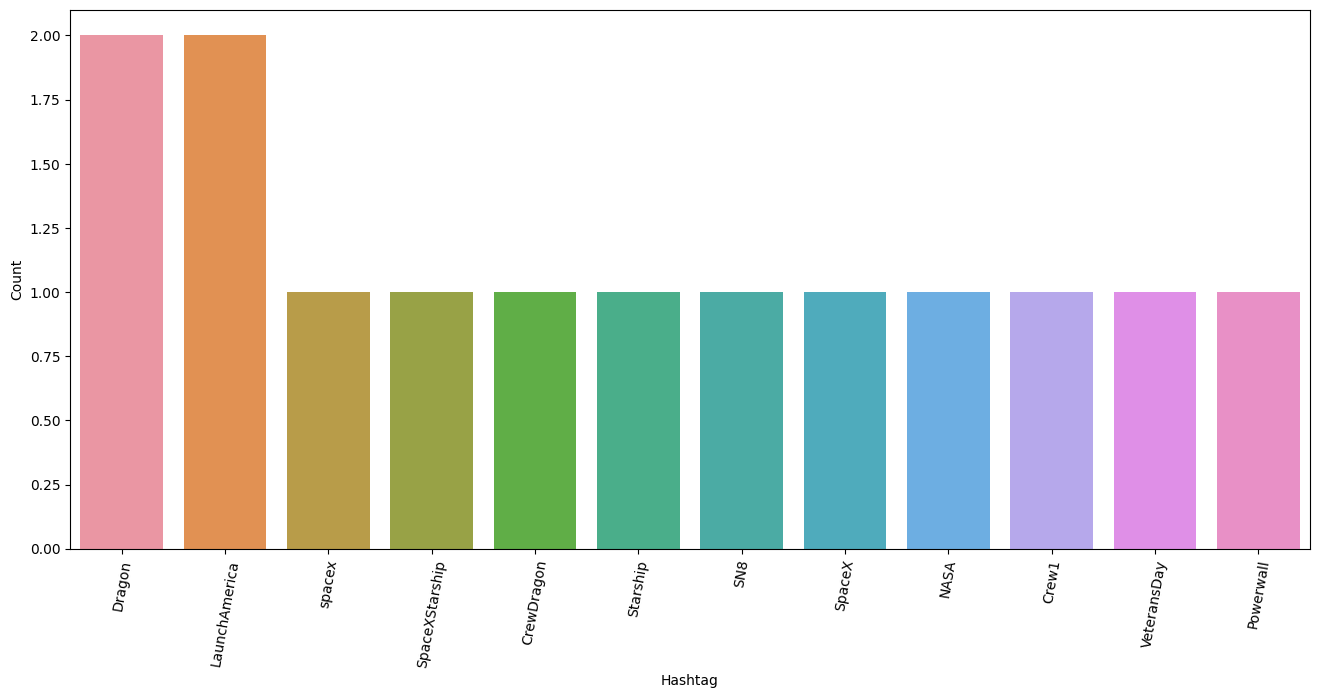

In [111]:
generate_hashtag_freqdist(hashtags)

### **Model Building: Sentiment Analysis** ###

In [112]:
#target_variable = em_data['SENTIMENT'].apply(lambda x: 0 if x=='neg' else 1)
target_variable = [(0 if x=='neg' else 1) for x in em_data['SENTIMENT']]

In [113]:
def plot_confusion_matrix(matrix):
    plt.figure(figsize = (10,7))
    classnames = ['Positive','Negative']
    sns.heatmap(matrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Reds",linewidths=3)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Confusion Matrix - Testing Data")

In [114]:
def naive_model(x_train, x_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(x_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(x_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

#### **A. Predictions on 'key words' based features - Using Guassian Naive Bayes** ####

##### ***a. BOW word features*** #####

Accuracy Score - 0.6632302405498282


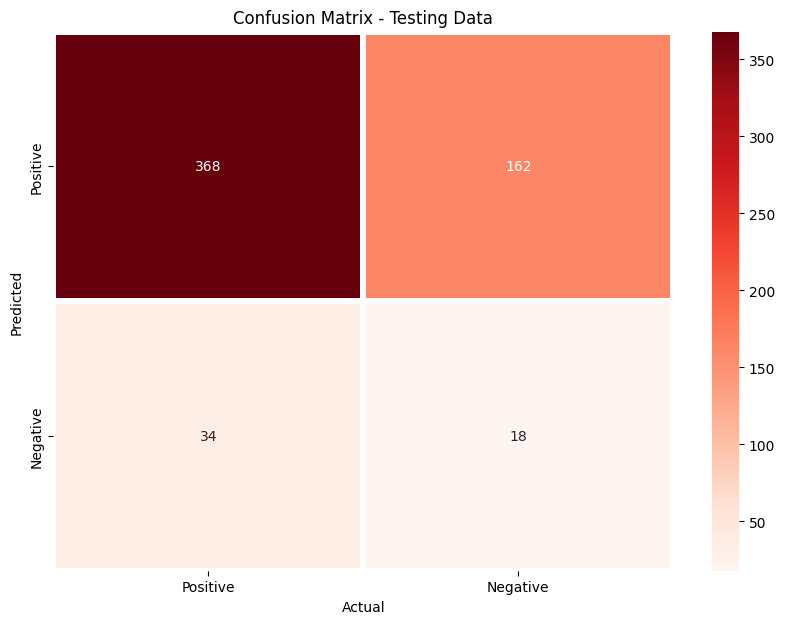

In [115]:
x_train, x_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(x_train, x_test, y_train, y_test)

##### ***b. TF-IDF word features*** #####

Accuracy Score - 0.6597938144329897


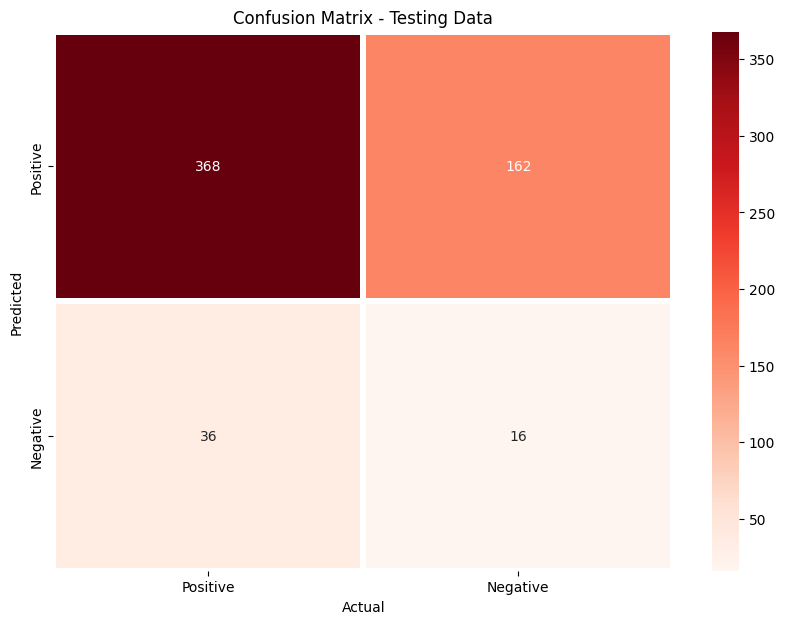

In [116]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(x_train, x_test, y_train, y_test)

**Features extracted from 'keywords' or 'key-phrase' help the model in performing better. They have better positive predictions than the earlier ones. However, using 'key-phrase' based features also improves the negative predictions.**

In [117]:
#em_data['SENTIMENT_BINARY'] = em_data['SENTIMENT'].apply(lambda x: 0 if x=='neg' else 1) # Using lambda
em_data['SENTIMENT_BINARY'] = [(0 if x=='neg' else 1) for x in em_data['SENTIMENT']]


In [118]:
pipeline_ls = make_pipeline(CountVectorizer(max_df=0.90, min_df=2, tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [119]:
x_train, x_test, y_train, y_test = train_test_split(em_data.ABSOLUTE_TIDY_TWEETS, em_data.SENTIMENT_BINARY)

In [120]:
pipeline_ls.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.9, min_df=2, stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [121]:
pipeline_ls.score(x_test,y_test)

0.8907216494845361

### **Using Randomforest with 200 Trees** ###

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
converter = TfidfVectorizer(stop_words=stopwords.words('english'))
x = converter.fit_transform(em_data.ABSOLUTE_TIDY_TWEETS).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
y = em_data.SENTIMENT_BINARY

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [125]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

In [126]:
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [127]:
classifier.score(x_test, y_test)

0.9123711340206185

In [128]:
# Creating confusion matrix to know where our model failed
y_predicted = classifier.predict(x_test)

# Here, y_test is truth and y_predicted is predicted.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  6,  33],
       [  1, 348]])

Text(0.5, 1.0, 'Confusion Matrix - Testing Data')

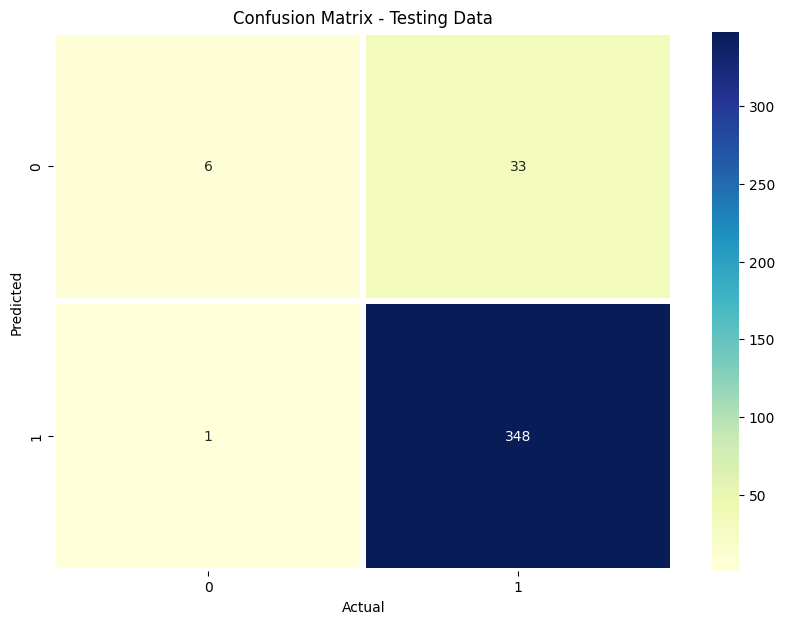

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
classnames = ['0','1']
sns.heatmap(cm,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="YlGnBu",linewidths=3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix - Testing Data")


In [130]:
tweet1 = "This was a bad coverage of the news by the reporter"
tweet2 = "Everone liked the recent movies coming in Hindi and enjoyed it a lot"

In [131]:
x1 = converter.transform([tweet1, tweet2]).toarray()
classifier.predict(x1)

array([0, 1])

##### **INFERENCE** #####
- tweet1 is predicted as a negative comment.
- tweet2 is predicted as a positive comment.

##### **Based on the model predictions and the tweets provided as inputs, we are able to predict if it is a positive or negative comment** #####